# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Student Depression Dataset.csv")

df = df.drop(columns=['id'])

df.head(10)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


### Task 1

#### City

In [3]:
df.sample(10)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18994,Male,26.0,Indore,Student,5.0,0.0,8.14,1.0,0.0,Less than 5 hours,Moderate,PhD,Yes,4.0,4.0,Yes,1
13696,Female,34.0,Hyderabad,Student,3.0,0.0,9.39,1.0,0.0,More than 8 hours,Unhealthy,B.Arch,Yes,11.0,5.0,Yes,1
11389,Male,21.0,Vasai-Virar,Student,5.0,0.0,6.99,2.0,0.0,7-8 hours,Unhealthy,M.Com,No,10.0,4.0,Yes,1
27266,Female,24.0,Srinagar,Student,5.0,0.0,9.89,3.0,0.0,Less than 5 hours,Moderate,B.Arch,No,12.0,4.0,Yes,1
12535,Female,27.0,Vasai-Virar,Student,1.0,0.0,5.74,5.0,0.0,More than 8 hours,Moderate,BHM,No,10.0,1.0,No,0
7354,Female,29.0,Vasai-Virar,Student,5.0,0.0,9.02,2.0,0.0,More than 8 hours,Unhealthy,M.Tech,Yes,11.0,5.0,Yes,1
3809,Male,28.0,Visakhapatnam,Student,3.0,0.0,7.77,5.0,0.0,Less than 5 hours,Moderate,MSc,No,9.0,3.0,No,0
2400,Male,18.0,Ahmedabad,Student,5.0,0.0,5.66,5.0,0.0,More than 8 hours,Moderate,Class 12,No,7.0,5.0,Yes,1
15389,Female,30.0,Nagpur,Student,4.0,0.0,6.89,4.0,0.0,7-8 hours,Healthy,MCA,Yes,2.0,5.0,No,1
26116,Male,26.0,Pune,Student,4.0,0.0,9.74,3.0,0.0,7-8 hours,Healthy,BBA,Yes,6.0,4.0,No,1


In [4]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
df.groupby(by=['City'])['Depression'].sum()[:10]

City
3.0            1
Agra         585
Ahmedabad    640
Bangalore    467
Bhavna         2
Bhopal       579
Chennai      528
City           1
Delhi        468
Faridabad    271
Name: Depression, dtype: int64

There is some corellation between the city and the number of depressed students as we can clearly see that some cities have up to 800+ students with depression, while others have a mere 1-2

In [6]:
print(*df['City'].unique()[:10], sep='\n')
print('Number of cities: ', len(df['City'].unique()))

Visakhapatnam
Bangalore
Srinagar
Varanasi
Jaipur
Pune
Thane
Chennai
Nagpur
Nashik
Number of cities:  52


In [7]:
df.loc[df['City']=='3.0']

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
7021,Female,21.0,3.0,Student,3.0,0.0,8.69,4.0,0.0,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1


Some weird data - probably have to remove it

In [8]:
df = df[df['City'] != '3.0']
df.loc[df['City']=='3.0']

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


#### Gender

In [9]:
by_gender = df.groupby('Gender')['Depression'].sum().reset_index()
by_gender

,Gender,Depression
0,Female,7220
1,Male,9115


In [10]:
df[['Gender']].value_counts().sort_index().values

array([12353, 15547])

In [11]:
by_gender['Depression'] = (by_gender['Depression'] * 100 / df[['Gender']].value_counts().sort_index().values) 
by_gender

,Gender,Depression
0,Female,58.447341
1,Male,58.628674


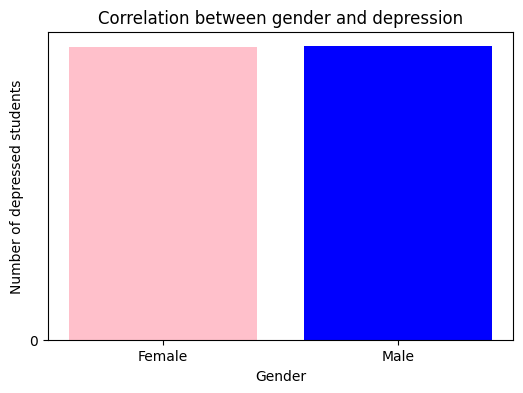

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(by_gender['Gender'], by_gender['Depression'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.yticks(list(range(0, 1)))
plt.ylabel('Number of depressed students')
plt.title('Correlation between gender and depression')
plt.show()

There is no clear relationship between gender and depression among students

#### Age

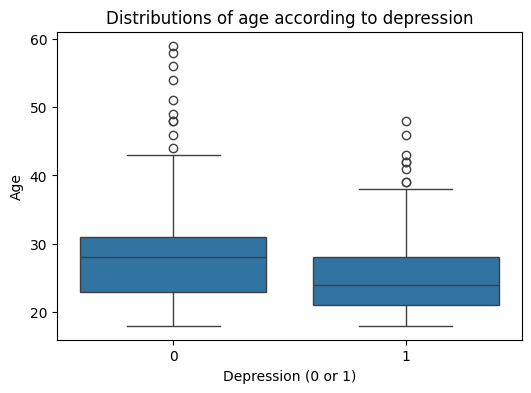

In [13]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Age', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Age')
plt.title('Distributions of age according to depression')
plt.show()

#### Other things to consider

<Axes: >

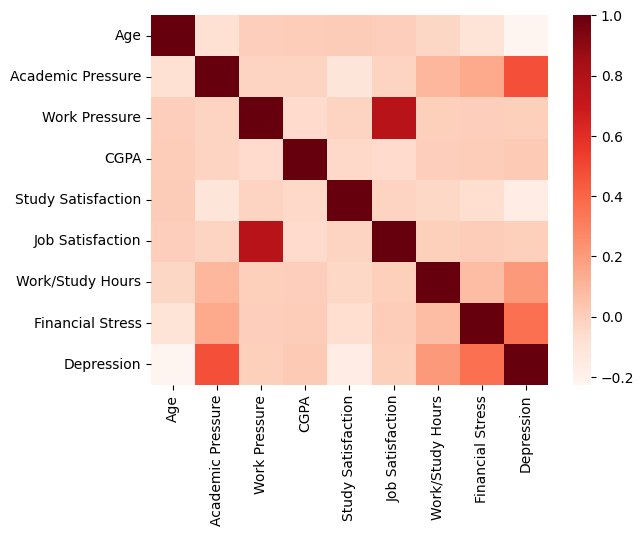

In [14]:
import seaborn as sns

correlation = df[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']].corr()
sns.heatmap(correlation, cmap="Reds")

We should probably focus on **financial and academic stress**

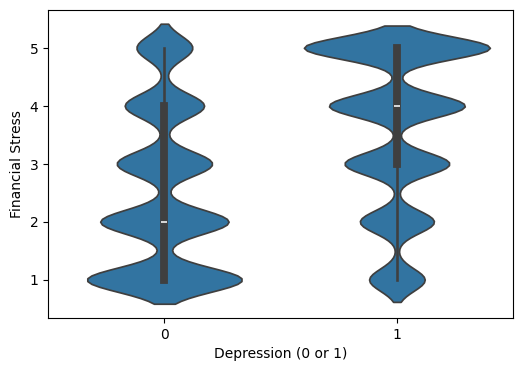

In [15]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Financial Stress', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Financial Stress')
plt.show()

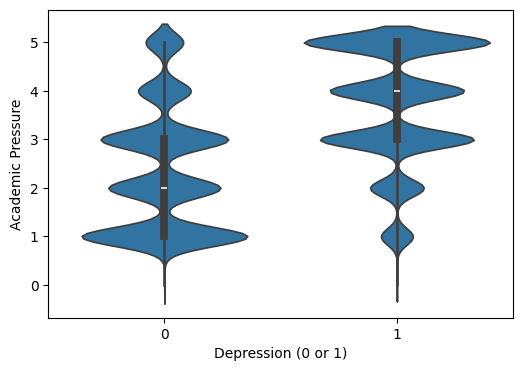

In [16]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Academic Pressure', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Academic Pressure')
plt.show()

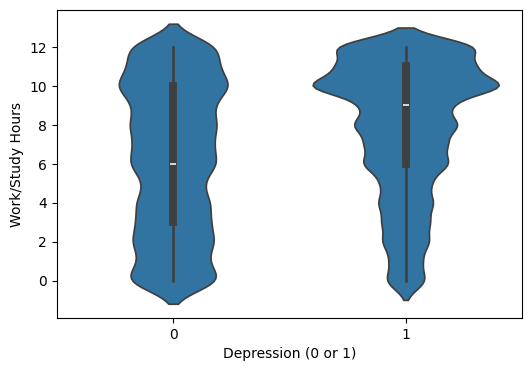

In [17]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Work/Study Hours', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Work/Study Hours')
plt.show()

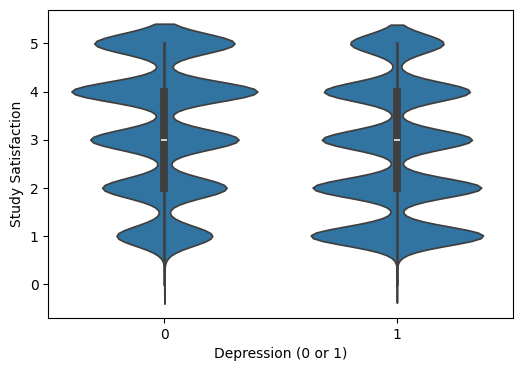

In [18]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Study Satisfaction', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Study Satisfaction')
plt.show()

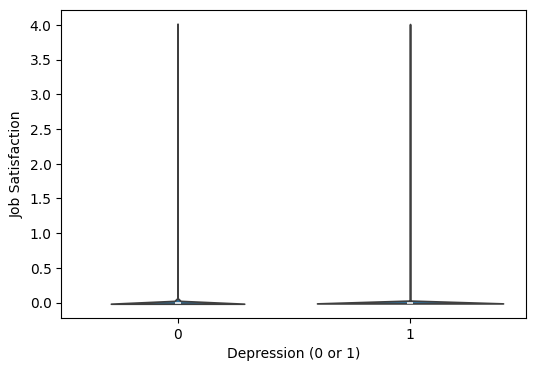

In [19]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Job Satisfaction', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Job Satisfaction')
plt.show()

In [20]:
df['Job Satisfaction'].describe()

count    27900.000000
mean         0.000681
std          0.044395
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Job Satisfaction, dtype: float64

We can clearly see that
- Individuals with depression (1) tend to have higher academic pressure and financial stress than those without it.
- The peak density for depressed individuals is around 3-5, whereas non-depressed individuals have more variation.
- There is still some overlap, meaning not everyone with high academic pressure and severe financial stress experiences depression, and vice versa.

#### Other things to consider

In [21]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [22]:
by_sleep = df.groupby('Sleep Duration')['Depression'].sum().reset_index()
by_diet = df.groupby('Dietary Habits')['Depression'].sum().reset_index()
by_thoughts = df.groupby('Have you ever had suicidal thoughts ?')['Depression'].sum().reset_index()
by_family_history = df.groupby('Family History of Mental Illness')['Depression'].sum().reset_index()



by_sleep.iloc[2], by_sleep.iloc[0] = by_sleep.iloc[0], by_sleep.iloc[2]
by_sleep.iloc[1], by_sleep.iloc[2] = by_sleep.iloc[2], by_sleep.iloc[1]
by_sleep

,Sleep Duration,Depression
0,Less than 5 hours,5361
1,5-6 hours,3517
2,7-8 hours,4370
3,More than 8 hours,3078
4,Others,9


In [23]:
by_diet.iloc[2], by_diet.iloc[3] = by_diet.iloc[3], by_diet.iloc[2]


In [24]:
by_diet

,Dietary Habits,Depression
0,Healthy,3473
1,Moderate,5558
2,Unhealthy,7296
3,Others,8


Text(0.5, 1.0, 'Family history of Mental Illness')

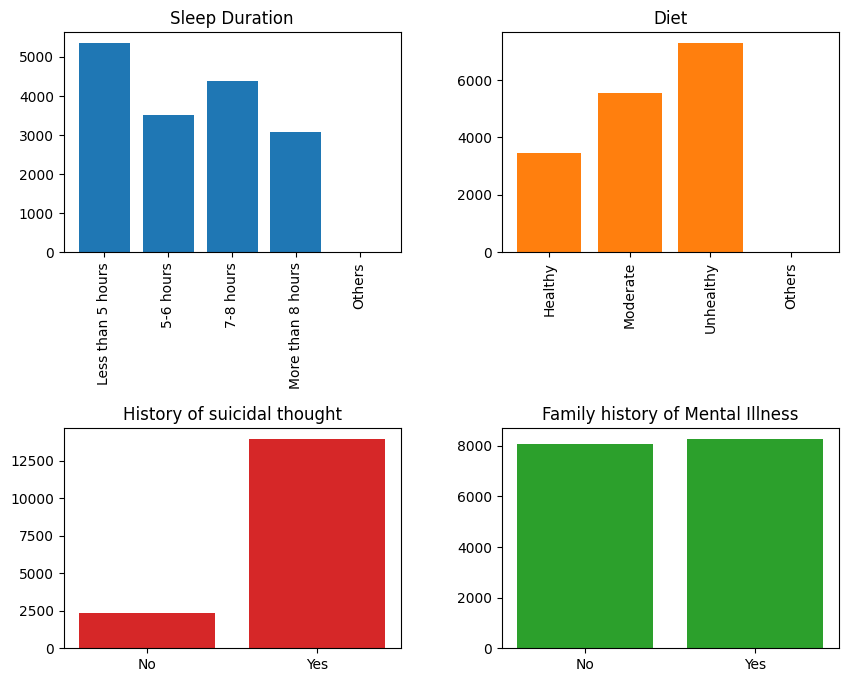

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plt.subplots_adjust(hspace=0.8, wspace=0.3)

axs[0, 0].bar(by_sleep['Sleep Duration'], by_sleep['Depression'])
axs[0, 0].set_title('Sleep Duration')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].bar(by_diet['Dietary Habits'], by_diet['Depression'], color='tab:orange')
axs[0, 1].set_title('Diet')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].bar(by_thoughts['Have you ever had suicidal thoughts ?'], by_thoughts['Depression'], color='tab:red')
axs[1, 0].set_title('History of suicidal thought')
axs[1, 1].bar(by_family_history['Family History of Mental Illness'], by_family_history['Depression'], color='tab:green')
axs[1, 1].set_title('Family history of Mental Illness')



I think, we should include fields for history of suicidal thoughts and diet into our feature matrix as we can see a clear relationship between them and the nubmer of students struggling with depression

### Task 2 - Data processing

In [26]:
X = df[['Academic Pressure', 'Financial Stress', 'Dietary Habits', 'Have you ever had suicidal thoughts ?']]
X.head(5)

,Academic Pressure,Financial Stress,Dietary Habits,Have you ever had suicidal thoughts ?
0,5.0,1.0,Healthy,Yes
1,2.0,2.0,Moderate,No
2,3.0,1.0,Healthy,No
3,3.0,5.0,Moderate,Yes
4,4.0,1.0,Moderate,Yes


In [27]:
X = X.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal_Thoughts', 
                  'Academic Pressure' : 'Academic_Pressure',
                  'Financial Stress' : 'Financial_Stress',
                  'Dietary Habits' : 'Diet'})

In [28]:
X['Suicidal_Thoughts'] = X['Suicidal_Thoughts'].map({'Yes': 1, 'No': 0})
X.head(5)

,Academic_Pressure,Financial_Stress,Diet,Suicidal_Thoughts
0,5.0,1.0,Healthy,1
1,2.0,2.0,Moderate,0
2,3.0,1.0,Healthy,0
3,3.0,5.0,Moderate,1
4,4.0,1.0,Moderate,1


In [29]:
X = pd.get_dummies(X, columns=['Diet'], dtype=int)
X

,Academic_Pressure,Financial_Stress,Suicidal_Thoughts,Diet_Healthy,Diet_Moderate,Diet_Others,Diet_Unhealthy
0,5.0,1.0,1,1,0,0,0
1,2.0,2.0,0,0,1,0,0
2,3.0,1.0,0,1,0,0,0
3,3.0,5.0,1,0,1,0,0
4,4.0,1.0,1,0,1,0,0
...,...,...,...,...,...,...,...
27896,5.0,1.0,1,0,0,0,1
27897,2.0,3.0,0,1,0,0,0
27898,3.0,2.0,0,0,0,0,1
27899,5.0,5.0,1,1,0,0,0


In [30]:
X = X.drop(columns =['Diet_Others'])
X

,Academic_Pressure,Financial_Stress,Suicidal_Thoughts,Diet_Healthy,Diet_Moderate,Diet_Unhealthy
0,5.0,1.0,1,1,0,0
1,2.0,2.0,0,0,1,0
2,3.0,1.0,0,1,0,0
3,3.0,5.0,1,0,1,0
4,4.0,1.0,1,0,1,0
...,...,...,...,...,...,...
27896,5.0,1.0,1,0,0,1
27897,2.0,3.0,0,1,0,0
27898,3.0,2.0,0,0,0,1
27899,5.0,5.0,1,1,0,0


### Task 3

In [31]:
np.argwhere(np.isnan(X))

array([[ 4458,     1],
       [13595,     1],
       [19265,     1]])

In [32]:
X['Financial_Stress'] = X['Financial_Stress'].fillna(X['Financial_Stress'].mean())

In [33]:
np.argwhere(np.isnan(X))

array([], shape=(0, 2), dtype=int64)

In [34]:
X = np.array(X)
y = np.array(df['Depression'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [36]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
y_pred = log_reg.predict(X_test)

print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.832078853046595
0.8283154121863799


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

class_names = ['Not Depressed', 'Depressed']

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

Not Depressed       0.81      0.76      0.79      2320
    Depressed       0.84      0.87      0.86      3260

     accuracy                           0.83      5580
    macro avg       0.83      0.82      0.82      5580
 weighted avg       0.83      0.83      0.83      5580



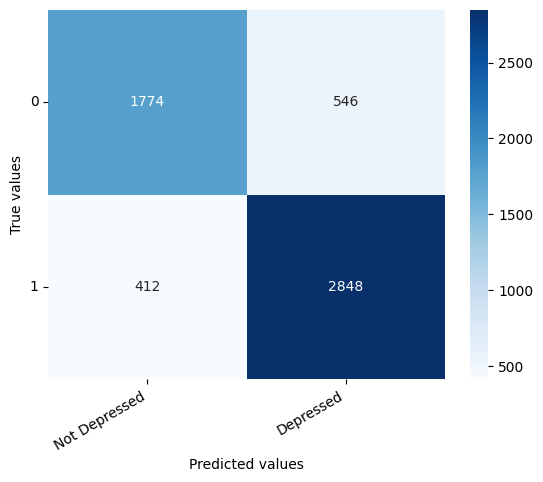

In [39]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True values')
    plt.xlabel('Predicted values');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=class_names)
show_confusion_matrix(df_cm)

In [40]:
y_score = log_reg.decision_function(X_test)
y_score

array([4.01028171, 0.5645619 , 3.71386634, ..., 1.47067561, 2.30086268,
       3.71386634], shape=(5580,))

In [41]:
from sklearn.metrics import roc_curve, auc


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], threshold = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], threshold = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

tpr.keys()

dict_keys([0, 1, 'micro'])

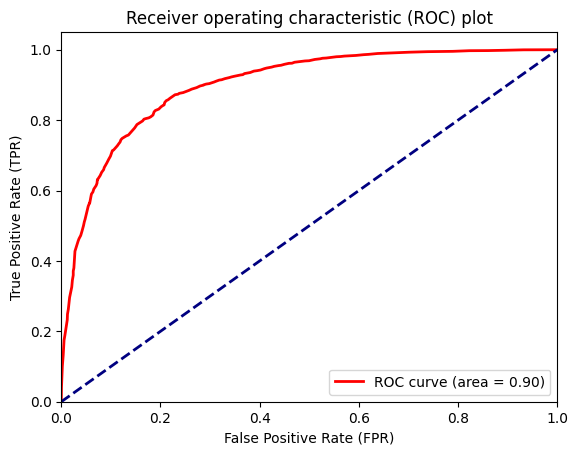

In [42]:
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    lw=lw,
    color='red',
    label="ROC curve (area = %0.2f)" % roc_auc[1]
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver operating characteristic (ROC) plot")
plt.legend(loc="lower right")
plt.show()

---
---

## Part two

### Task 1 – Evaluate and Visualize Metric Changes Across Thresholds
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

    How would you define the optimal threshold ?
    

### Task 2 - Include a financial cost
    In the context of predicting student depression, if the model outputs a positive prediction (the student is predicted as being depressed), you must pay for the student to go to the hospital. 
    This cost is substantial, therefore, it is crucial not only to evaluate the standard classification metrics—such as accuracy, precision, recall, and F1-score—but also to consider the financial implications of your predictions.

    Find a way to define the optimal threshold, including the cost of a positive prediction.


### Task 3 - Cross validation & hyperparameters optimization
    What are the hyperparameters in the logistic regression. 
    Change your code to find the optimal hyperparameters and train it with cross validation
    

### Task 4 - Investigate and understand predictions
    Now that you have an optimized classification (almost), you want to understand why it predicts some students as depressed.
    You might be interested by analysing the difference of feature values for different predicted populations (TP TN FP & FN).
    You could also have a look at the weights of you logistic regression.



### Task1

In [43]:
y_test

array([1, 1, 1, ..., 1, 1, 1], shape=(5580,))

In [44]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(5580,))

In [45]:
def calculate_conf_values(y_true, y_pred):
    tp = tn = fp = fn = 0

    for true, pred in zip(y_true, y_pred):
        if true == pred:
            if true == 1:
                tp += 1 
            else:
                tn += 1
        else:
            if true == 1 :
                fn += 1
            else:
                fp += 1
    
    return tp, tn, fp, fn

tp, tn, fp, fn = calculate_conf_values(y_test, y_pred)

print(f"True positive: {tp}", f"True negative: {tn}", 
      f"False positive: {fp}", f"False negative: {fn}", sep="\n"
)

True positive: 2848
True negative: 1774
False positive: 546
False negative: 412


Here, we use a method for log_red - `predict_proba`, which gives us the probabilities of being a speicific class.

In [46]:
confusion_values_list = []
metrics_dict = {"f1" : [], "acc" : [], "precision" : [], "recall" : []}

y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[0.0178055 , 0.9821945 ],
       [0.36249258, 0.63750742],
       [0.02380269, 0.97619731],
       ...,
       [0.18683995, 0.81316005],
       [0.09105154, 0.90894846],
       [0.02380269, 0.97619731]], shape=(5580, 2))

In [47]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

for threshold in threshold_list:
    y_pred_threshold = map(lambda x: 1 if x[1] > threshold else 0, y_pred_proba)
    conf_values = calculate_conf_values(y_test, y_pred_threshold)
    tp_cur, tn_cur, fp_cur, fn_cur = conf_values
    
    acc = (tp_cur + tn_cur) / (tp_cur + tn_cur + fp_cur + fn_cur)
    recall = (tp_cur) / (tp_cur + fn_cur)

    if tp_cur + fp_cur != 0:
        precision = (tp_cur) / (tp_cur + fp_cur)
    f1 = 2 * ((precision * recall) / (precision + recall))
    
    metrics_dict["acc"].append(acc)
    metrics_dict["recall"].append(recall)
    metrics_dict["precision"].append(precision)
    metrics_dict["f1"].append(f1)

    confusion_values_list.append(conf_values)

print(confusion_values_list[:5])

[(3244, 515, 1805, 16), (3225, 840, 1480, 35), (3189, 1055, 1265, 71), (3153, 1197, 1123, 107), (3113, 1304, 1016, 147)]


In [48]:
tp_list = [metric[0] for metric in confusion_values_list]
tn_list = [metric[1] for metric in confusion_values_list]
fp_list = [metric[2] for metric in confusion_values_list]
fn_list = [metric[3] for metric in confusion_values_list]

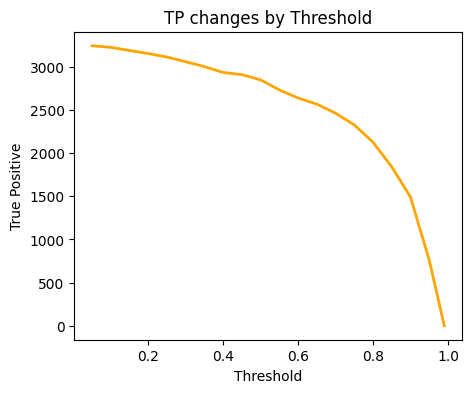

In [49]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    tp_list,
    lw=lw,
    color='orange',
    label="True Positive Curve"
)
plt.xlabel("Threshold")
plt.ylabel("True Positive")
plt.title("TP changes by Threshold")
plt.show()

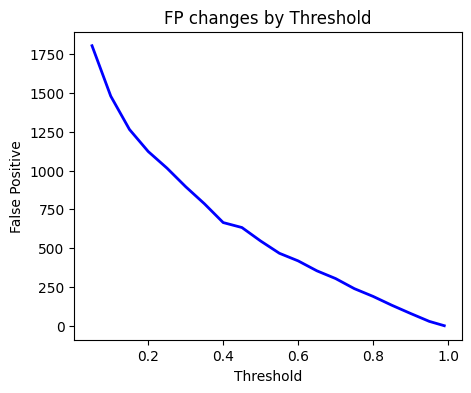

In [50]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    fp_list,
    lw=lw,
    color='blue',
    label="False Positive Curve"
)
plt.xlabel("Threshold")
plt.ylabel("False Positive")
plt.title("FP changes by Threshold")
plt.show()

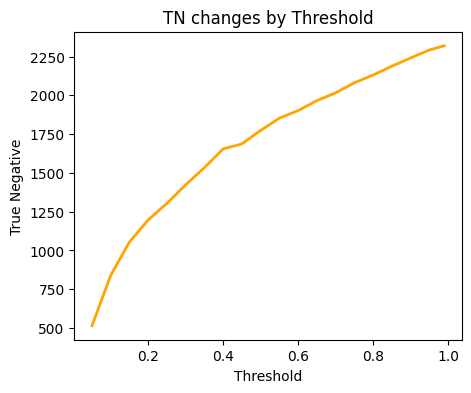

In [51]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    tn_list,
    lw=lw,
    color='orange',
    label="True Negative Curve"
)
plt.xlabel("Threshold")
plt.ylabel("True Negative")
plt.title("TN changes by Threshold")
plt.show()

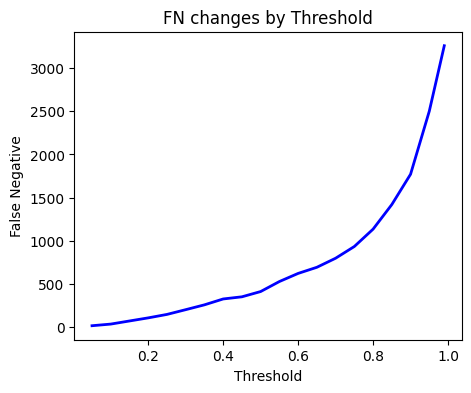

In [52]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    fn_list,
    lw=lw,
    color='blue',
    label="False Negative Curve"
)
plt.xlabel("Threshold")
plt.ylabel("False Negative")
plt.title("FN changes by Threshold")
plt.show()

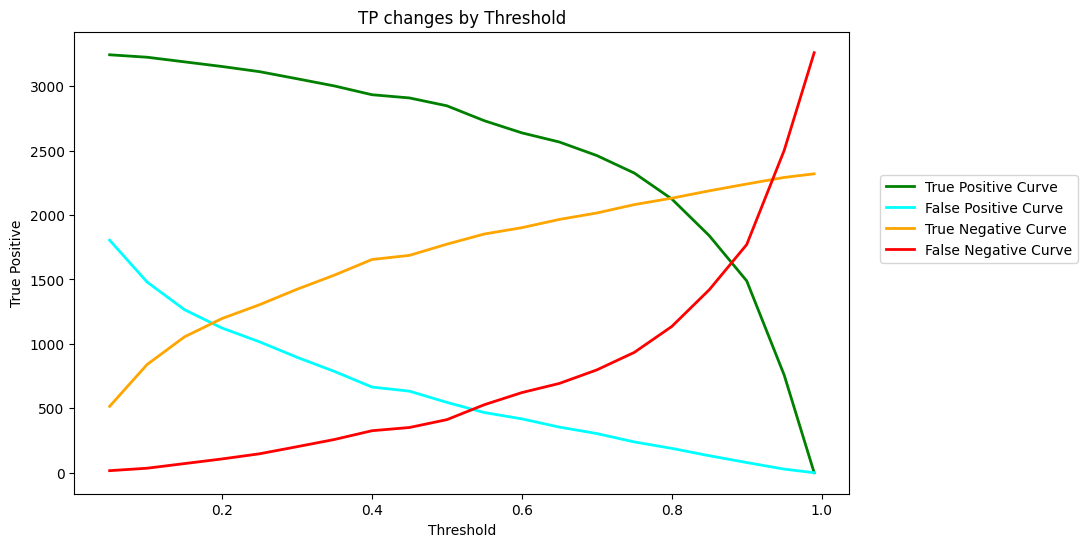

In [53]:
fig = plt.figure(figsize=(10,6))
plt.plot(
    threshold_list,
    tp_list,
    lw=lw,
    color='green',
    label="True Positive Curve"
)
plt.plot(
    threshold_list,
    fp_list,
    lw=lw,
    color='cyan',
    label="False Positive Curve"
)
plt.plot(
    threshold_list,
    tn_list,
    lw=lw,
    color='orange',
    label="True Negative Curve"
)
plt.plot(
    threshold_list,
    fn_list,
    lw=lw,
    color='red',
    label="False Negative Curve"
)
plt.xlabel("Threshold")
plt.ylabel("True Positive")
plt.title("TP changes by Threshold")
plt.legend(loc=(1.04, 0.5))
plt.show()

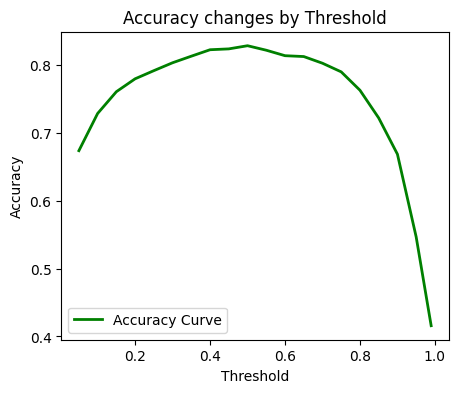

In [54]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    metrics_dict["acc"],
    lw=lw,
    color='green',
    label="Accuracy Curve"
)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy changes by Threshold")
plt.legend(loc="lower left")
plt.show()

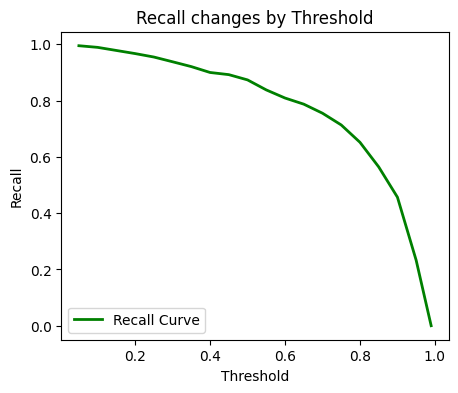

In [55]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    metrics_dict["recall"],
    lw=lw,
    color='green',
    label="Recall Curve"
)
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall changes by Threshold")
plt.legend(loc="lower left")
plt.show()

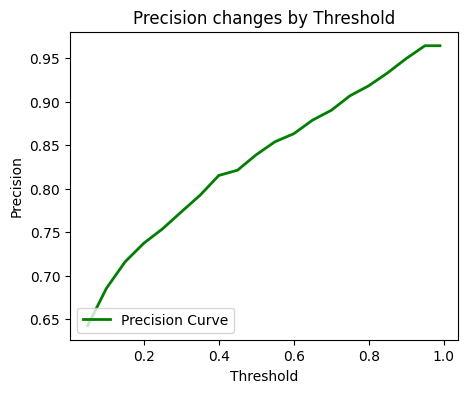

In [56]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    metrics_dict["precision"],
    lw=lw,
    color='green',
    label="Precision Curve"
)
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision changes by Threshold")
plt.legend(loc="lower left")
plt.show()

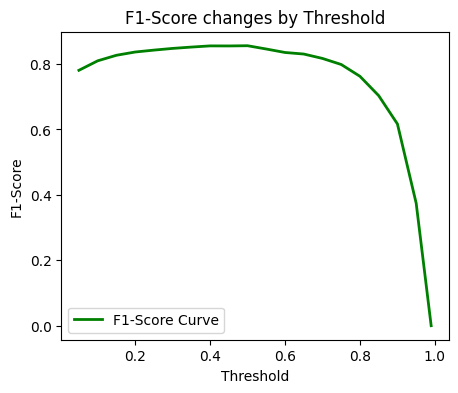

In [57]:
fig = plt.figure(figsize=(5,4))
plt.plot(
    threshold_list,
    metrics_dict["f1"],
    lw=lw,
    color='green',
    label="F1-Score Curve"
)
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score changes by Threshold")
plt.legend(loc="lower left")
plt.show()

#### Optimal threshold

It is possible to define the optimal threshold as a value that maximizes both **precision** and **recall**

We can calculate it the following way

In [59]:
from sklearn.metrics import precision_recall_curve

precision_values, recall_values, threshold_values = precision_recall_curve(y_test, y_pred)
f_score = (2 * precision_values * recall_values) / (precision_values + recall_values)

ix = np.argmax(f_score)
print(f'Best threshold={threshold_values[ix]:.3f}, F1-score={f_score[ix]:.3f}')

Best threshold=1.000, F1-score=0.856


For the data and we have provided the best threshold is 1.0 meaning we get a balance between identifying positive classes and doing it accurately only when the threshold is 1.0.

In other words, the best f1_score happens when we are strict with our predictions and demand the probability of the positive class to be 100% for a student to be classified as depressed.

### Task 2

In [ ]:
y_total_pred = log_reg.predict(X)
y_total_pred

array([1, 0, 0, ..., 0, 1, 1], shape=(27900,))

In [78]:
from collections import Counter

y_total_pred_count = Counter(y_total_pred)
print(y_total_pred_count)
y_total_pred_count = dict(map(lambda x: (int(x), y_total_pred_count[x]),y_total_pred_count))
print(y_total_pred_count)

Counter({np.int64(1): 17151, np.int64(0): 10749})
{1: 17151, 0: 10749}


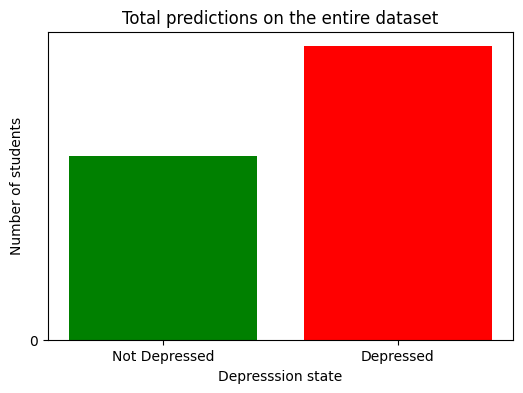

In [84]:
plt.figure(figsize=(6, 4))
plt.bar(y_total_pred_count.keys(), y_total_pred_count.values(), color=['red', 'green'])
plt.xlabel('Depresssion state')
plt.xticks([0,1], labels=['Not Depressed', 'Depressed'])
plt.yticks(list(range(0, 1)))
plt.ylabel('Number of students')
plt.title('Total predictions on the entire dataset')
plt.show()

In [90]:
df.Depression.value_counts()

Depression
1    16335
0    11565
Name: count, dtype: int64

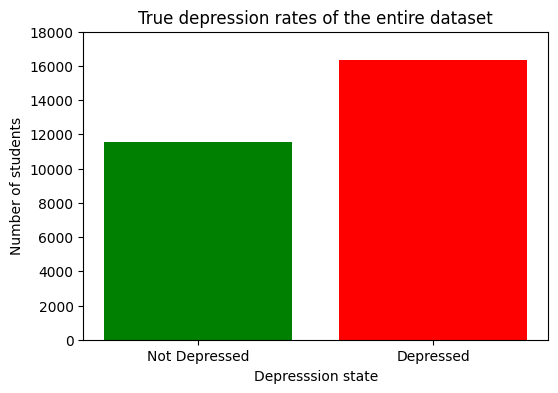

In [96]:
plt.figure(figsize=(6, 4))
plt.bar([0,1], df.Depression.value_counts().sort_index(), color=['green', 'red'])
plt.xlabel('Depresssion state')
plt.xticks([0,1], labels=['Not Depressed', 'Depressed'])
plt.yticks(list(range(0, 20000, 2000)))
plt.ylabel('Number of students')
plt.title('True depression rates of the entire dataset')
plt.show()

As we can see, there are more depressed students in this dataset, meaning that we would have to spend a substantial amount if we were to provide proper treatment to each of them.

However, our model's prediction on the entire dataset **overestimates** the number of depressed students by 816 people, meaning that if we were to use this model in practice, we would end up spending a lot more than we should have

If we take this [clinic](https://mentalclinic.kz/nevrologiya/depressiya). The price of 1 day in the clinic varies from 60,000 tenge up to 100,000 tenge. Which means, if we were to identify the students as not depressed on the first day, we woudl still have to pay the price of 1 day in stationary, which would be at least 48,960,000, in other words 50 million tenge.

In [98]:
17151-16335

816

In [99]:
816*60000

48960000

Considering all of this, and the calculations prior, it is safe to say that setting the threshold to 1.0 would be the most optimal solution in terms of both
1. maximizing precision and recall of predictions
2. minimizing the treatment expenses of healthy students

#### Task 3